**Examples**

Optimal Iceball

In [1]:
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

from pint import UnitRegistry
units = UnitRegistry()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.9 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [3]:
from modsim import *

In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap22.py')

Downloaded chap22.py


In [5]:
from chap22 import params
from chap22 import make_system
from chap22 import slope_func
from chap22 import event_func

The Manny Ramirez Problem

In [6]:
ftm = (1 * units.feet).to(units.meter).magnitude

params = params.set(
    wall_distance = 100 * ftm,
    wall_height = 10 * ftm,
)

show(params)

,value
x,0.000
y,1.000
angle,45.000
speed,40.000
mass,0.145
diameter,0.073
C_d,0.330
rho,1.200
g,9.800
t_end,10.000


Finding the Range

In [7]:
def range_func(angle, params):
    params = params.set(angle=angle)
    system = make_system(params)
    results, details = run_solve_ivp(system, slope_func, events=event_func)
    x_dist = results.iloc[-1].x
    print(angle, x_dist)
    return x_dist

In [9]:
range_func(45, params)
angle = linspace(10, 20, 15)
sweep = SweepSeries()

for angle in angle:
    x_dist = range_func(angle, params)
    sweep[angle] = x_dist

45 99.31829628352207
10.0 50.638821669866104
10.714285714285714 52.96309228903781
11.428571428571429 55.236994232450414
12.142857142857142 57.45806840398991
12.857142857142858 59.624405760241984
13.571428571428571 61.73452346513116
14.285714285714285 63.78726736433408
15.0 65.78173560376075
15.714285714285715 67.71732838528806
16.42857142857143 69.5942624977226
17.142857142857142 71.4124316411649
17.857142857142858 73.17175349268157
18.57142857142857 74.87226142435377
19.285714285714285 76.51408100133648
20.0 78.09741067882733


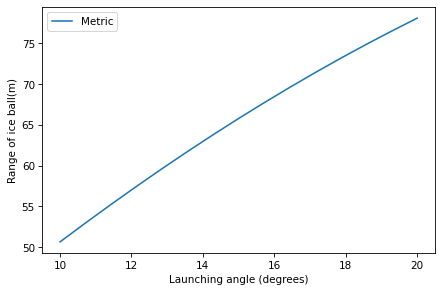

In [11]:
sweep.plot()
decorate(xlabel='Launching angle (degrees)',
         ylabel='Range of ice ball(m)')

In [12]:
result = maximize_scalar(range_func, params, bounds=[0, 90])
print(result)
print(result.x, result.fun)

0 17.468795355645696
34.37694101250946 98.06996498016366
55.62305898749054 90.03182421721928
21.246117974981075 80.72039493627986
41.173855871044005 100.1200188931698
40.980120907838035 100.12368377099199
40.882137319070246 100.1241700443184
40.87925420124324 100.12417043309694
40.87928713865314 100.12417043314977
40.879291078324286 100.12417043314917
40.879283198981994 100.12417043314895
 message: Solution found.
 success: True
  status: 0
     fun: 100.12417043314977
       x: 40.87928713865314
     nit: 10
    nfev: 10
40.87928713865314 100.12417043314977


**Exercises**

Exercise 1

In [13]:
def event_func(t, state, system):
    x, y, vx, vy = state
    return x - system.wall_distance
system = make_system(params)
event_func(0, system.init, system)

-30.479999999999997

In [16]:
def height_func(angle, params):
    params = params.set(angle=angle)
    system = make_system(params)

    result, details = run_solve_ivp(system, slope_func, events=event_func)
    height = result.iloc[-1].y
    return height

height_func(20, params)

8.442056202175186

In [17]:
result = maximize_scalar(height_func, params, bounds=[0, 90])
print(result)
print(result.x, result.fun)

 message: Solution found.
 success: True
  status: 0
     fun: 53.81682358983246
       x: 73.41788421405457
     nit: 14
    nfev: 14
73.41788421405457 53.81682358983246


In [30]:
def error_func(speed, params):
    params = params.set(speed=speed)
    print(params.speed)
    result = maximize_scalar(height_func, params, bounds=[0, 90])
    return result.fun - params.wall_height

print(error_func(20, params))
print(error_func(30, params))

20
2.307989858234151
30
27.6476239804371
